# Statistical Learning I
## PROYECTO DE CURSO – FASE 1
### Notebook 2
##### René Ronaldo Godoy Mejía, carné 23005126
##### Carlos Eduardo Carrera Roda, carné 23002113

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Cargamos el dataset

In [108]:
dataset = pd.read_csv("ObesityDataSet.csv")
dataset.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,NaN,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,NaN,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,NaN,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,NaN,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## 4.a. Imputación de variables con data faltante

##### Verificamos porcentaje faltantes por columna

In [109]:
dataset.isnull().mean()

Age                               0.000000
Gender                            0.000000
Height                            0.000000
Weight                            0.000000
CALC                              0.051634
FAVC                              0.000000
FCVC                              0.000000
NCP                               0.000000
SCC                               0.043581
SMOKE                             0.000000
CH2O                              0.044529
family_history_with_overweight    0.000000
FAF                               0.000000
TUE                               0.000000
CAEC                              0.000000
MTRANS                            0.000000
NObeyesdad                        0.000000
dtype: float64

##### Notamos que hay tres columnas que tiene datos faltantes por lo que procederemos a identificar la escala de cada una. Es decir, clasificaremos entre variables categóricas, continuas y discretas

#### Categoricas

In [110]:
categoricas = [col for col in dataset.columns if(dataset[col].dtypes == 'object')]
categoricas

['Gender',
 'CALC',
 'FAVC',
 'SCC',
 'SMOKE',
 'family_history_with_overweight',
 'CAEC',
 'MTRANS',
 'NObeyesdad']

#### Continuas

In [111]:
continuas = [col for col in dataset.columns if((dataset[col].dtypes in ['int64', 'float64']) and len(dataset[col].unique()) > 30)]
continuas

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

#### Discretas

In [112]:
discretas = [col for col in dataset.columns if((dataset[col].dtypes in ['int64', 'float64']) and len(dataset[col].unique()) <= 30)]
discretas

[]

### 4.a.i. Imputación de variables numéricas

##### Detectamos el porcentaje de faltantes en la variables numéricas continuas y seleccinamos aquellas variables que tiene valores faltantes

In [113]:
continuas_con_na = [col for col in continuas if dataset[col].isnull().mean() > 0]
dataset[continuas_con_na].isnull().mean() 

CH2O    0.044529
dtype: float64

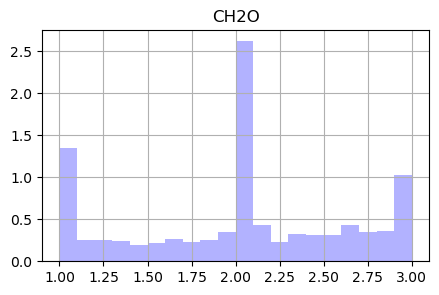

In [114]:
fig = plt.figure(figsize=(5, 3))
dataset['CH2O'].hist(bins=20, density=True, color='blue', alpha=0.3)
plt.title('CH2O')
plt.show()

##### En esta caso, revisaremos el impacto de la media y mediana al momento al realizar la imputación

#### Imputación por Media y Mediana

##### Media

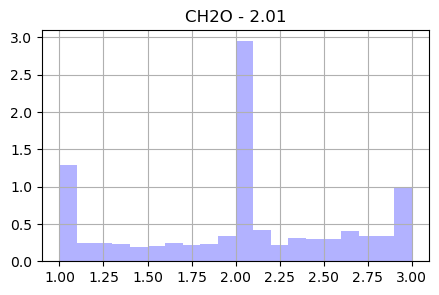

In [115]:
mean_CH2O = round(dataset['CH2O'].mean(), 2)

temp_series = dataset['CH2O'].fillna(mean_CH2O)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='blue', alpha=0.3)
plt.title('CH2O - ' + str(mean_CH2O))
plt.show()

##### Mediana

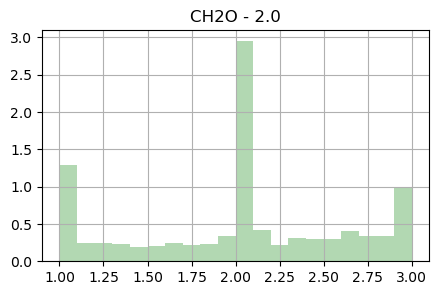

In [116]:
median_CH2O = round(dataset['CH2O'].median(), 2)

temp_series = dataset['CH2O'].fillna(median_CH2O)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='green', alpha=0.3)
plt.title('CH2O - ' + str(median_CH2O))
plt.show()

##### Imputación

Dada la cantidad de registros en particular para la cantidad de CH2O, se realizaré la imputación por la mediana.

In [117]:
dataset['CH2O'].fillna(median_CH2O, inplace=True)

### 4.a.ii. Imputación de variables categóricas

In [118]:
categoricas_con_na = [col for col in categoricas if dataset[col].isnull().mean() > 0]
dataset[categoricas_con_na].isnull().mean()

CALC    0.051634
SCC     0.043581
dtype: float64

In [119]:
categoricas = [col for col in dataset.columns if(dataset[col].dtypes == 'object')]
categoricas

['Gender',
 'CALC',
 'FAVC',
 'SCC',
 'SMOKE',
 'family_history_with_overweight',
 'CAEC',
 'MTRANS',
 'NObeyesdad']

In [120]:
categoricas_con_na = [col for col in categoricas if dataset[col].isnull().mean() > 0]
dataset[categoricas_con_na].isnull().mean()

CALC    0.051634
SCC     0.043581
dtype: float64

##### Análisis de varible CALC

In [121]:
dataset['CALC'].value_counts().head()

CALC
Sometimes     1292
no             639
Frequently      70
Always           1
Name: count, dtype: int64

En este caso dado el porcentaje de faltantes en la varibale CALC, imputaremos la categoría con mayor frecuencia en la columna, en este caso sería el valor **Sometimes**.

In [122]:
dataset['CALC'].fillna('Sometimes', inplace=True)

##### Anális de la variable SCC

In [123]:
dataset['SCC'].value_counts().head()

SCC
no     1928
yes      91
Name: count, dtype: int64

En este caso dado el porcentaje de faltantes en la varibale CALC, imputaremos la categoría con mayor frecuencia en la columna, en este caso sería el valor **no**.

In [124]:
dataset['SCC'].fillna('no', inplace=True)

In [125]:
dataset.isnull().mean()

Age                               0.0
Gender                            0.0
Height                            0.0
Weight                            0.0
CALC                              0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
SCC                               0.0
SMOKE                             0.0
CH2O                              0.0
family_history_with_overweight    0.0
FAF                               0.0
TUE                               0.0
CAEC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
dtype: float64

### 4.b. Codificación de las variables categóricas

Data la naturaleza de este dataset y debido a que la cantidad de categorías por cada columna puede ser variable, utilizaremos una codificación por frecuencia para las variable categóricas.

In [126]:
categoricas = [col for col in dataset.columns if(dataset[col].dtypes == 'object')]
categoricas

['Gender',
 'CALC',
 'FAVC',
 'SCC',
 'SMOKE',
 'family_history_with_overweight',
 'CAEC',
 'MTRANS',
 'NObeyesdad']

In [127]:
for col in categoricas:
       values_for_encode = dataset[col].value_counts().to_dict()
       dataset[col] = dataset[col].map(values_for_encode)

Validamos que todas las columnas sean de tipo numéricas.

In [128]:
dataset.dtypes

Age                               float64
Gender                              int64
Height                            float64
Weight                            float64
CALC                                int64
FAVC                                int64
FCVC                              float64
NCP                               float64
SCC                                 int64
SMOKE                               int64
CH2O                              float64
family_history_with_overweight      int64
FAF                               float64
TUE                               float64
CAEC                                int64
MTRANS                              int64
NObeyesdad                          int64
dtype: object

En este caso, todas las variables son de tipo numérico por lo que hemos completado el proceso de codificación de variables categóricas.

## 4.d. Tratamiento de Outliers

Se volvieron a visualizar cuales son las variables continuas, que necesitan ser revisadas.

In [129]:
continuas = [col for col in dataset.columns if(dataset[col].dtypes in ['float64', 'int64']) and (len(dataset[col].unique()) > 30)]
continuas

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

Se creó una copia del dataset original para visualizar las viriables con outliers antes de su transformación.

In [130]:
dataset_CAPP = dataset.copy()

Age


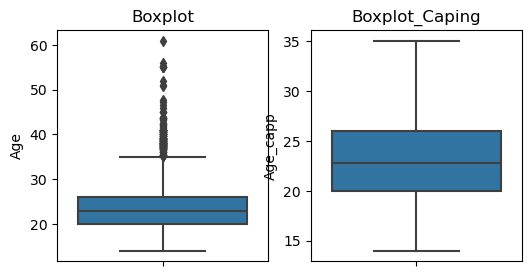

Height


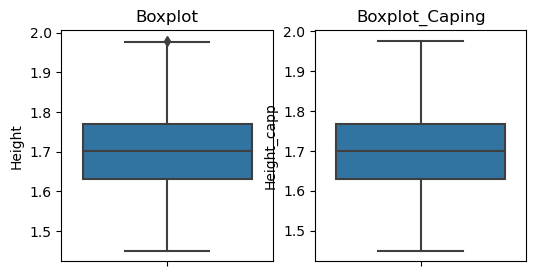

Weight


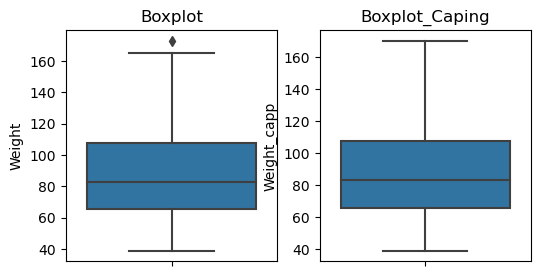

FCVC


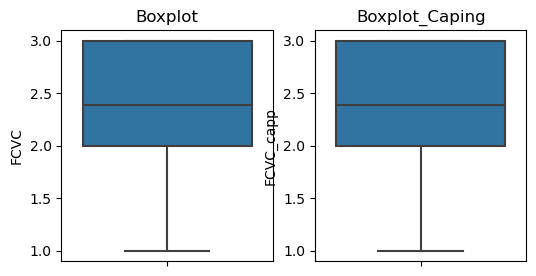

NCP


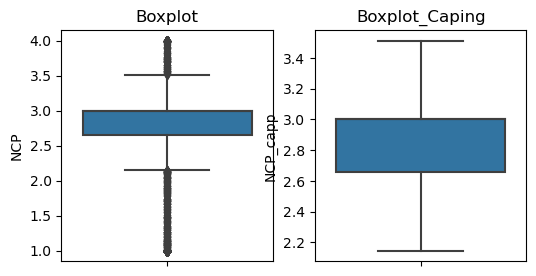

CH2O


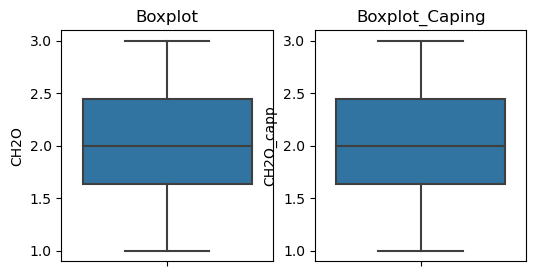

FAF


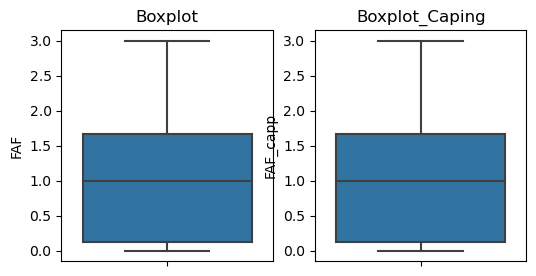

TUE


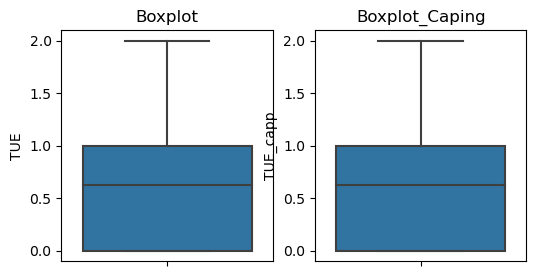

In [131]:
for col in continuas:
       IQR = dataset_CAPP[col].quantile(0.75) - dataset_CAPP[col].quantile(0.25)
       LI = dataset_CAPP[col].quantile(0.25) - 1.5*IQR
       LS = dataset_CAPP[col].quantile(0.75) + 1.5*IQR

       dataset_CAPP[col+'_capp'] = np.where(dataset_CAPP[col] > LS, LS, np.where(dataset_CAPP[col] < LI, LI, dataset_CAPP[col]))

       print(col)

       plt.figure(figsize=(6, 3))
       plt.subplot(121)
       plt.title("Boxplot")
       sns.boxplot(y=dataset_CAPP[col])

       plt.subplot(122)
       plt.title("Boxplot_Caping")
       sns.boxplot(y=dataset_CAPP[col + "_capp"])

       plt.show()


Se aplicó la transformación de variables al dataset original

Age


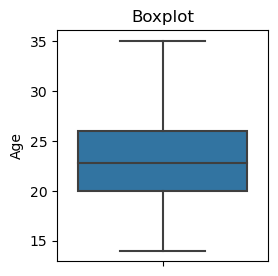

Height


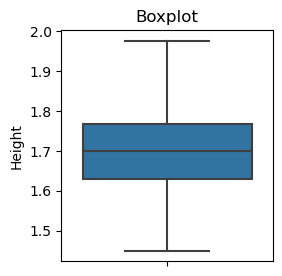

Weight


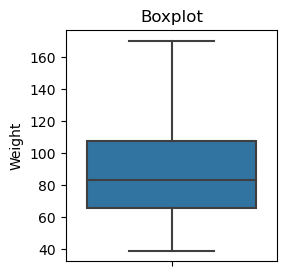

FCVC


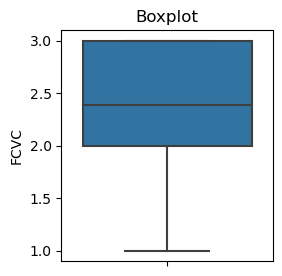

NCP


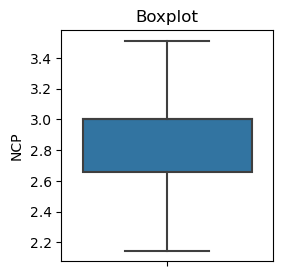

CH2O


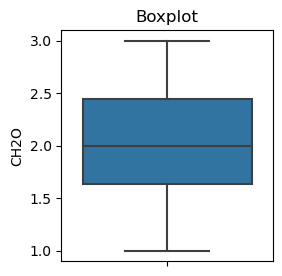

FAF


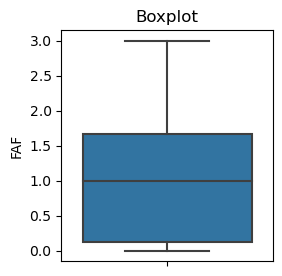

TUE


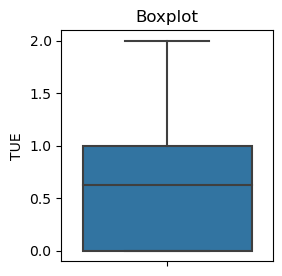

In [132]:
for col in continuas:
       IQR = dataset[col].quantile(0.75) - dataset_CAPP[col].quantile(0.25)
       LI = dataset[col].quantile(0.25) - 1.5*IQR
       LS = dataset[col].quantile(0.75) + 1.5*IQR

       dataset[col] = np.where(dataset[col] > LS, LS, np.where(dataset[col] < LI, LI, dataset[col]))

       print(col)

       plt.figure(figsize=(6, 3))
       plt.subplot(121)
       plt.title("Boxplot")
       sns.boxplot(y=dataset[col]) 

       plt.show()

## 4.c. Transformación de variables númericas

In [133]:
import scipy.stats as stats

Se volvió a visualizar cuales son las variables continuas, las cuales necesitan ser transformadas.

In [134]:
continuas

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [135]:
def plot_sensity_qq(dataset, variable):

       plt.figure(figsize=(8, 3))

       plt.subplot(121)
       dataset[variable].hist(bins=30)
       plt.title(variable)

       plt.subplot(122)
       stats.probplot(dataset[variable], dist="norm", plot=plt)
       
       plt.show()

Se aplicó los diferentes tipos de transformaciones a cada variable, sin embargo, se dejaron unicamente las transformaciones que mas se adecuaban a la distribución de los datos de cada variable. 

##### Variable Age

In [136]:
dataset['Age'].describe()

count    2111.000000
mean       23.910914
std         5.277530
min        14.000000
25%        19.947192
50%        22.789402
75%        26.000000
max        35.079212
Name: Age, dtype: float64

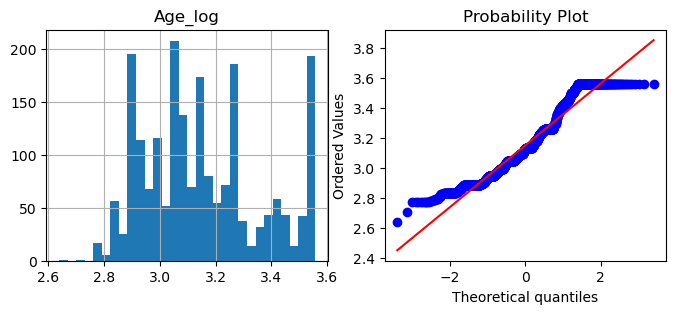

In [137]:
dataset['Age_log'] = np.log(dataset['Age'])
plot_sensity_qq(dataset, 'Age_log')

#### Variable Height

In [138]:
dataset['Height'].describe()

count    2111.000000
mean        1.701676
std         0.093299
min         1.450000
25%         1.630000
50%         1.700499
75%         1.768464
max         1.976160
Name: Height, dtype: float64

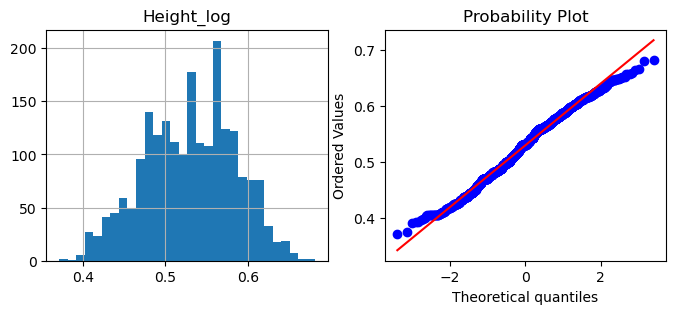

In [139]:
dataset['Height_log'] = np.log(dataset['Height'])
plot_sensity_qq(dataset, 'Height_log')

#### Variable Weight

In [140]:
dataset['Weight'].describe()

count    2111.000000
mean       86.584811
std        26.187117
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       170.366691
Name: Weight, dtype: float64

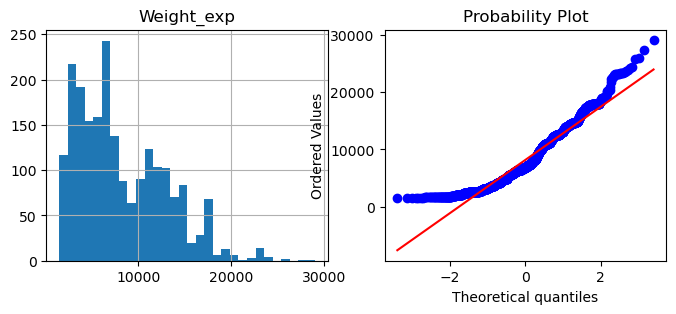

In [141]:
dataset['Weight_exp'] = dataset['Weight'] ** 2
plot_sensity_qq(dataset, 'Weight_exp')

#### Variable FCVC

In [142]:
dataset['FCVC'].describe()

count    2111.000000
mean        2.419043
std         0.533927
min         1.000000
25%         2.000000
50%         2.385502
75%         3.000000
max         3.000000
Name: FCVC, dtype: float64

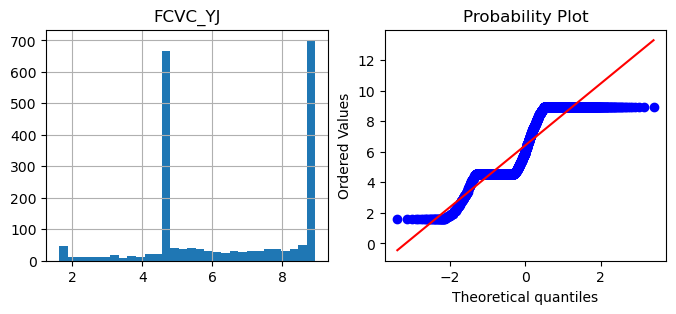

In [143]:
dataset['FCVC_YJ'], lmbd_FCVC = stats.yeojohnson(dataset['FCVC'])
plot_sensity_qq(dataset, 'FCVC_YJ')

#### Variable NCP

In [144]:
dataset['NCP'].describe()

count    2111.000000
mean        2.835525
std         0.400898
min         2.146845
25%         2.658738
50%         3.000000
75%         3.000000
max         3.511893
Name: NCP, dtype: float64

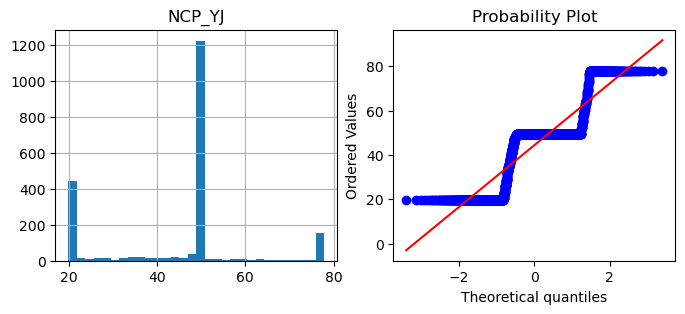

In [145]:
dataset['NCP_YJ'], lmbd_NCP = stats.yeojohnson(dataset['NCP'])
plot_sensity_qq(dataset, 'NCP_YJ')

#### Variable CH2O

In [146]:
dataset['CH2O'].describe()

count    2111.000000
mean        2.011480
std         0.600312
min         1.000000
25%         1.636326
50%         2.000000
75%         2.446111
max         3.000000
Name: CH2O, dtype: float64

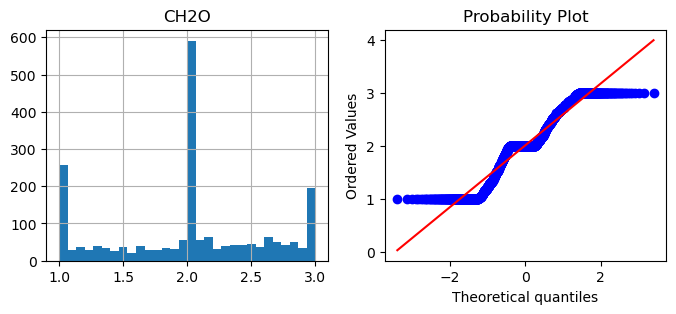

In [147]:
dataset['CH2O_inv'] = 1 / dataset['CH2O']
plot_sensity_qq(dataset, 'CH2O')

#### Variable FAF

In [148]:
dataset['FAF'].describe()

count    2111.000000
mean        1.010298
std         0.850592
min         0.000000
25%         0.124505
50%         1.000000
75%         1.666678
max         3.000000
Name: FAF, dtype: float64

In [149]:
dataset["FAF"] = dataset["FAF"]+1

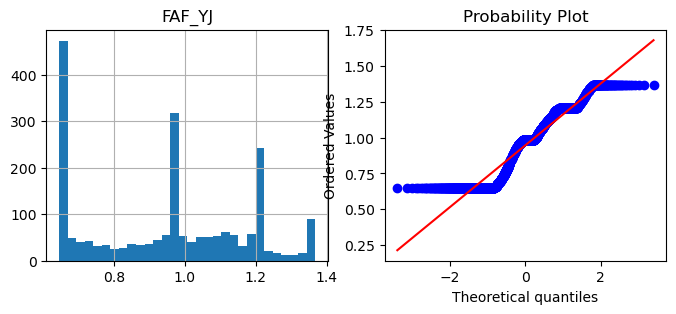

In [150]:
dataset['FAF_YJ'], lmbd_stays_in_week_nights = stats.yeojohnson(dataset['FAF'])
plot_sensity_qq(dataset, 'FAF_YJ')

#### Variable TUE

In [151]:
dataset['TUE'].describe()

count    2111.000000
mean        0.657866
std         0.608927
min         0.000000
25%         0.000000
50%         0.625350
75%         1.000000
max         2.000000
Name: TUE, dtype: float64

In [152]:
dataset["TUE"] = dataset["TUE"]+1

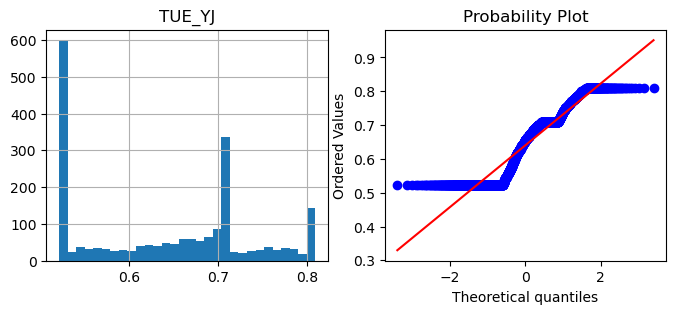

In [153]:
dataset['TUE_YJ'], lmbd_TUE = stats.yeojohnson(dataset['TUE'])
plot_sensity_qq(dataset, 'TUE_YJ')

## 4.e. Feature Scaling

Se empieza la normalización de los valores de cada variable, con el fin de mejorar la precisión del modelo. 

In [154]:
for col in dataset:
    min_LF = dataset[col].min()
    max_LF = dataset[col].max()
    range_LF = (max_LF-min_LF)

    dataset[col] = (dataset[col]-min_LF)/(range_LF)

In [155]:
dataset.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,...,MTRANS,NObeyesdad,Age_log,Height_log,Weight_exp,FCVC_YJ,NCP_YJ,CH2O_inv,FAF_YJ,TUE_YJ
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,...,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.470175,0.505921,0.478325,0.362229,0.803246,0.883941,0.709522,0.504510,0.956892,0.979157,...,0.811232,0.400236,0.557969,0.512097,0.242198,0.656729,0.423555,0.332458,0.417286,0.413013
std,0.250367,0.500083,0.177321,0.199344,0.285387,0.320371,0.266963,0.293688,0.203147,0.142893,...,0.328874,0.325401,0.228847,0.177692,0.173427,0.300067,0.269539,0.307830,0.310709,0.335841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.282135,0.000000,0.342101,0.201522,0.455714,1.000000,0.500000,0.375000,1.000000,1.000000,...,0.286078,0.189873,0.385423,0.377970,0.100559,0.402319,0.264588,0.113218,0.071920,0.000000
50%,0.416970,1.000000,0.476089,0.334940,1.000000,1.000000,0.692751,0.625000,1.000000,1.000000,...,1.000000,0.227848,0.530442,0.514736,0.195173,0.608961,0.508636,0.250000,0.466028,0.464753
75%,0.569281,1.000000,0.605261,0.520913,1.000000,1.000000,1.000000,0.625000,1.000000,1.000000,...,1.000000,0.658228,0.673930,0.641321,0.364326,1.000000,0.508636,0.416688,0.682568,0.655758
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Se ajustó a cuatro decimales para una manipulación mas certera en el dataset

In [156]:
for col in dataset:
    dataset[col]=round(dataset[col],4)

dataset.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,...,MTRANS,NObeyesdad,Age_log,Height_log,Weight_exp,FCVC_YJ,NCP_YJ,CH2O_inv,FAF_YJ,TUE_YJ
0,0.3321,0.0,0.3231,0.1903,0.4557,0.0,0.5,0.625,1.0,1.0,...,1.0000,0.1899,0.4414,0.3581,0.0936,0.4023,0.5086,0.25,0.0000,0.6558
1,0.3321,0.0,0.1330,0.1294,1.0000,0.0,1.0,0.625,0.0,0.0,...,1.0000,0.1899,0.4414,0.1523,0.0587,1.0000,0.5086,0.00,1.0000,0.0000
2,0.4270,1.0,0.6652,0.2893,0.0493,0.0,0.5,0.625,1.0,1.0,...,1.0000,0.1899,0.5405,0.6984,0.1603,0.4023,0.5086,0.25,0.7737,0.6558
3,0.6167,1.0,0.6652,0.3654,0.0493,0.0,1.0,0.625,1.0,1.0,...,0.0312,0.2278,0.7150,0.6984,0.2199,1.0000,0.5086,0.25,0.7737,0.0000
4,0.3795,1.0,0.6272,0.3867,1.0000,0.0,0.5,0.000,1.0,1.0,...,1.0000,0.2278,0.4921,0.6623,0.2379,0.4023,0.0000,0.25,0.0000,0.0000


#### Escritura de Archivo de Variables a Disco.

In [157]:
dataset.to_csv("ObesityDataSet_Fase1.csv", index=False)